In [1]:
%matplotlib inline
import main
import spark_greedy
from pyspark import SparkContext
import matplotlib.pyplot as plt
import time
import json
import networkx as nx

In [2]:
class SetEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, set):
            return list(obj)
        return json.JSONEncoder.default(self, obj)

In [3]:
#sc = SparkContext( 'spark://headnodehost:7077', appName = 'greedy_full', pyFiles=['main.py', 'spark_greedy.py'])
sc = SparkContext( 'local[*]', appName = 'greedy_full', pyFiles=['main.py', 'spark_greedy.py'])

In [4]:
partitions = sc.parallelize(range(1,1000)).getNumPartitions()
partitions

8

In [5]:
NC_digraph = main.import_graph("nc_full.json")

In [6]:
NC_broadcast = sc.broadcast(NC_digraph)

In [7]:
def fileName(num_trials, k, N, t):
    return "{}trials_{}k_{}N_{}t_info.json".format(str(num_trials), str(k), str(N), str(t))

In [ ]:
start = time.time()
num_trials = 20
k = 3
N_arr = [50]
t_arr = [4, 7, 10]
for N in N_arr:
    for t in t_arr:
        trials = spark_greedy.greedy_trials(sc, num_trials, NC_broadcast.value, k, N, t, partitions)
        fd = open(fileName(num_trials, k, N, t),"w")
        json.dump(trials, fd, cls=SetEncoder)
        fd.close()
print time.time() - start

In [23]:
del trials
with open("{}info.json".format(N),"r") as fd:
    trials = json.load(fd)

In [24]:
_lambda = min(trials["results"])/max(trials["results"])
print min(trials["results"])
print max(trials["results"])
print _lambda

659.0
659.0
1.0


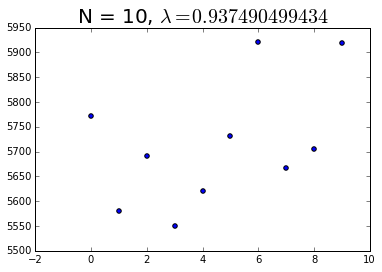

In [16]:
plt.scatter(range(0, len(trials["results"])),trials["results"])
plt.title(r'N = {}, $\lambda = {}$'.format(str(N),str(_lambda)), fontsize=20)
x1,x2,y1,y2 = plt.axis()

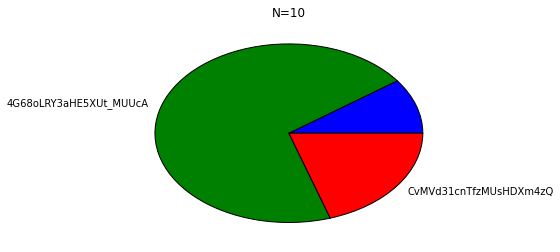

In [18]:
nodes_values = spark_greedy.node_count(trials)
patches, texts = plt.pie(nodes_values.values(), labels=map(lambda x: "" if nodes_values[x] < N/5 else x ,nodes_values.keys()))
texts[0].set_fontsize(1)
plt.title("N=" + str(N))